<h1 align="center">Volume 4: Inverse Problems.</h1>

    NAME Caelan Osman
    Section 1
    DATE January 25, 2022

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad
from autograd import numpy as anp
from autograd import elementwise_grad
from matplotlib import pyplot as plt

# Problem 1

Solve (16.2) for a(x).
Produce the plot shown in Figure 16.2.

In [2]:
def density(c0, c1, u, f, x_domain=[0, 1], Δx=0.1):
    '''
    Solves the inverse problem of the heat equation by finding the density of the rod
    a(x), given that the source function is f and that the heat distribution is given by u.
    :param c0: integration parameter
    :param c1: ?parameter
    :param u: heat distribution function
    :param f: heat source function
    :param x_domain: the domain over which this applied
    :param Δx: change in spatial domain
    :return: array representing the coefficeints of the density function in the polynomial basis.
    '''
    #get number of pints
    N = int((x_domain[-1] - x_domain[0])/ Δx) + 1
    #discretize the domain
    xs = np.arange(x_domain[0], x_domain[-1]+Δx, Δx)
    #intialize alpha
    α = np.empty_like(xs)
    #use autograd for the derivative
    Du = elementwise_grad(u)
    #now we go through and get all the alpha values
    for j, xj in enumerate(xs):
        #create current function to minimize
        current_func = lambda αj :((c0 - quad(f, 0, xj)[0]) / αj - Du(xj))**2
        #minimize and get the result
        result = minimize(current_func, 1)
        α[j] = result.x

    return xs, α

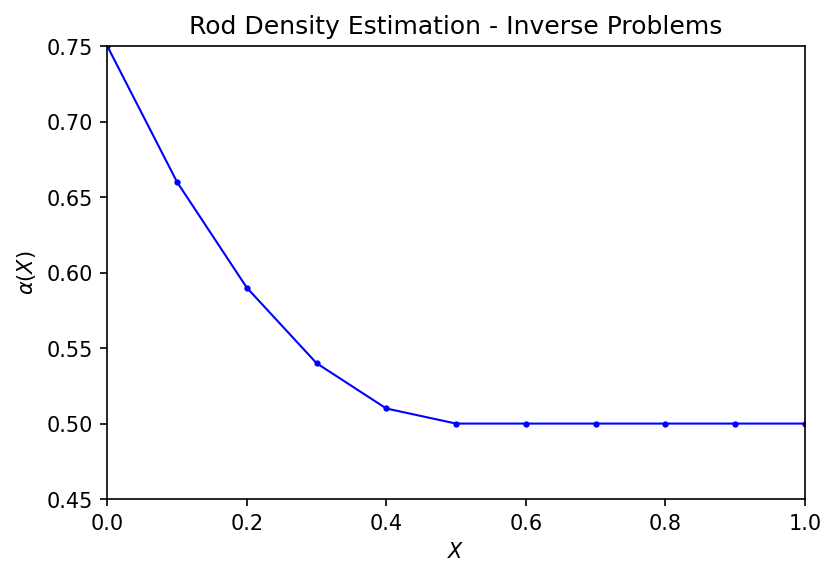

In [23]:
def problem1():
    #constatns
    c0 = 3/8.
    c1 = 5/4.
    #create functions
    u = lambda x: x**2 + x/2 + 5/16.
    def f(x):
        if x <= 1/2:
            return -6*x**2 +3*x-1
        else:
            return -1
        
    #call solver
    xs, α = density(c0, c1, u, f)
    
    #plot
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.plot(xs, α, 'b', marker='o', lw=1, markersize=2)
    ax.set_xlim([0, 1])
    ax.set_ylim([0.45, 0.75])
    ax.set_xlabel(r'$X$')
    ax.set_ylabel(r'$\alpha(X)$')
    ax.set_title(r'Rod Density Estimation - Inverse Problems')
    plt.show()

    return

problem1()

# Problem 2

Find the density function a(x). Using several values of ε > 0.66049142, plot the corresponding
density a(x) for x in np.linspace(0,1,11) to demonstrate that the problem is ill-posed.

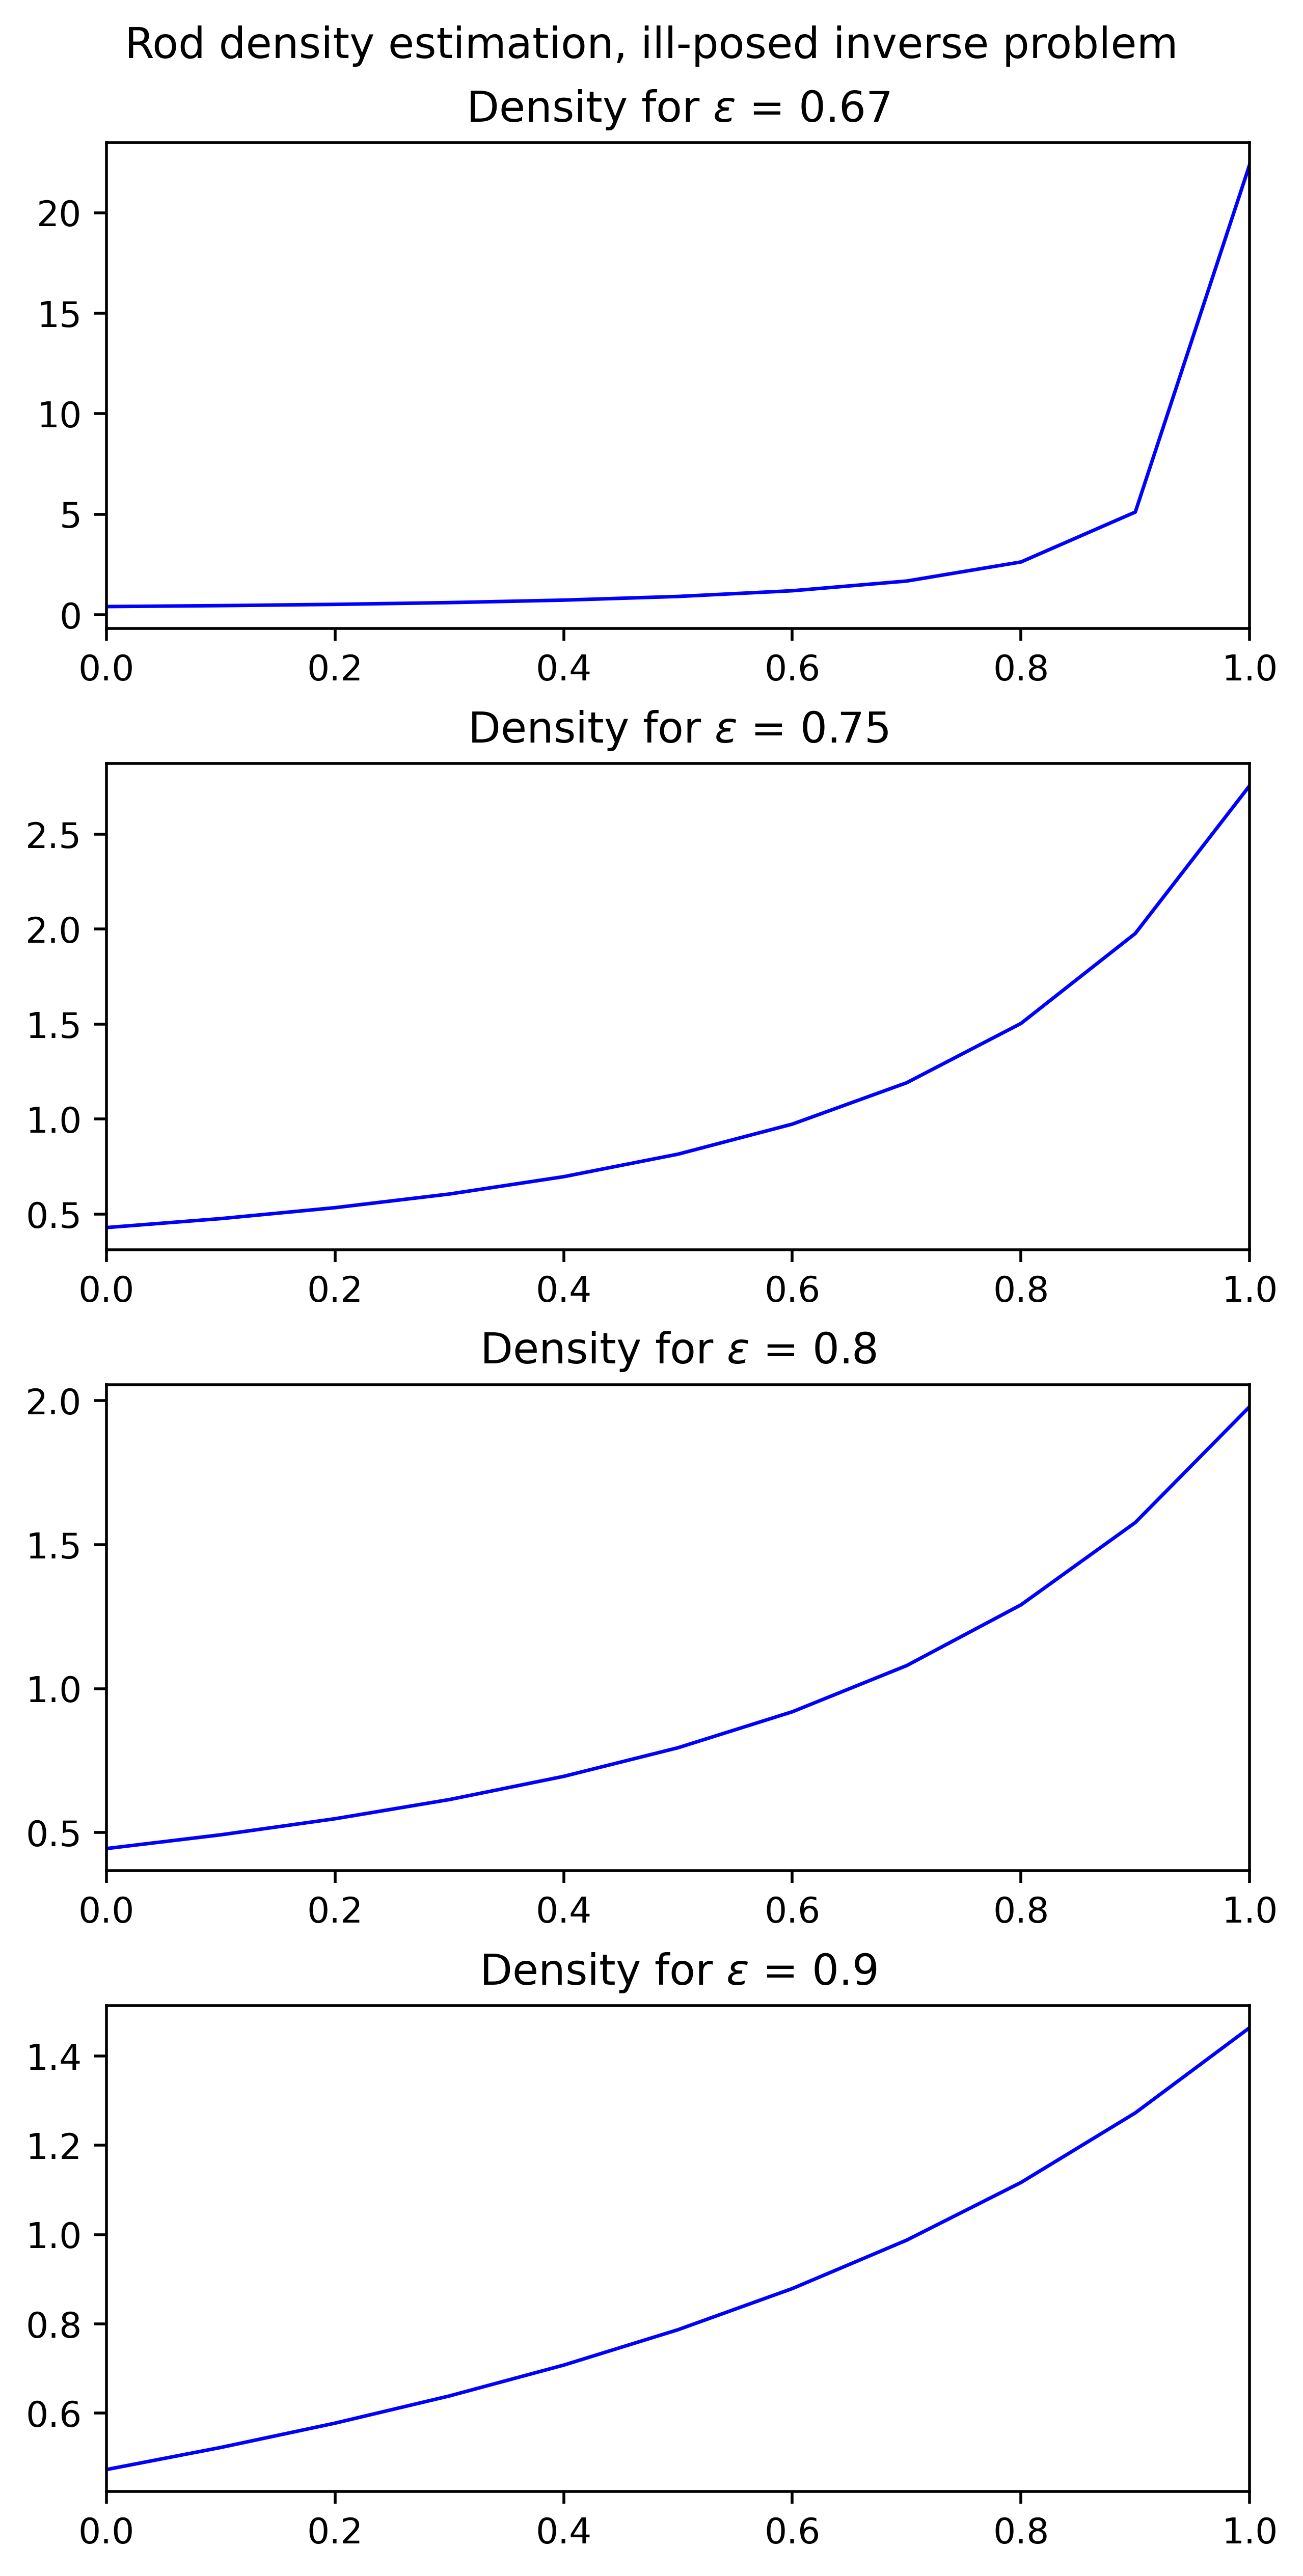

In [7]:
def problem2():
    #constants
    c0 = 1
    c1 = 2
    #create source function
    f = lambda x: -x**0.0
    #get different epsilon values
    ε_vals = [0.67, 0.75, 0.8, 0.9]
    #create figure
    fig, axs = plt.subplots(4, 1, constrained_layout=True, figsize=(5, 10))
    fig.set_dpi(500)
    for i, ε in enumerate(ε_vals):
        #get current heat distribution
        u = lambda x: x + 1 + ε*anp.sin(x/ε**2)
        #call solver
        xs, α = density(c0, c1, u, f)
        #plot
        ax = axs[i]
        ax.plot(xs, α, 'b-', lw=1)
        ax.set_xlim([0, 1])
        ax.set_title(r'Density for $\varepsilon$ = ' + str(ε))
        
    plt.suptitle('Rod density estimation, ill-posed inverse problem')
    plt.show()        
    
    return
problem2()